{'a': 'b', 'c': 'a', 'd': 'a'}


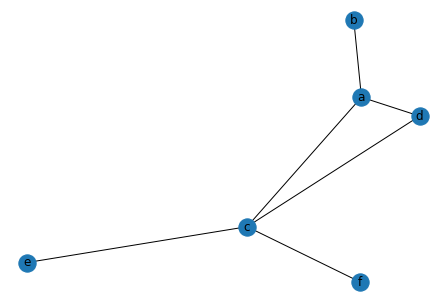

In [24]:
import networkx as nx
import heapq

G = nx.Graph()
G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=8)

nx.draw(G, with_labels=True)


def Dijkstra(G, start, target):
    F = set()
    dist = {v: float("Inf") for v in G}
    dist[start] = 0
    prev = {}
    unvisited = [(dist[n], n) for n in G]
    heapq.heapify(unvisited)
    while len(unvisited):
        current = heapq.heappop(unvisited)[1]
        F.add(current)
        for n in G[current]:
            if n in F:
                continue
            new_dist = dist[current] + G[current][n]['weight']
            if new_dist > dist[n]:
                continue
            dist[n] = new_dist
            prev[n] = current
        if current == target:
            return prev
        unvisited = [(dist[v], v) for v in G if not v in F]
        heapq.heapify(unvisited)
    return prev


print(Dijkstra(G, 'b', 'a'))

def GetPath(prev, target):
    path = [target]
    current = target
    while current in prev:
        current = prev[current]
        path.append(current)
    return path